In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import os
import random
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("./Tweets.csv")

In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [6]:
df.shape

(14640, 15)

<AxesSubplot: xlabel='airline_sentiment', ylabel='count'>

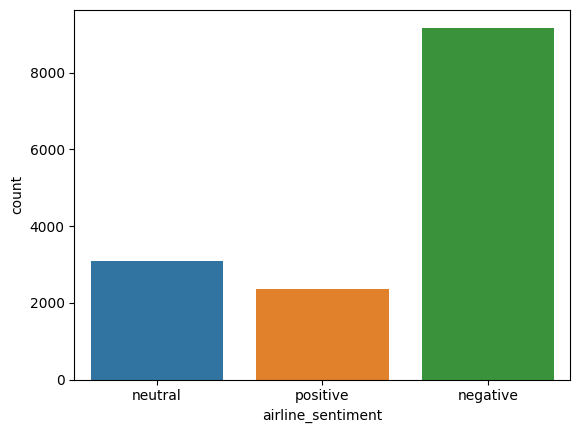

In [7]:
sns.countplot(x="airline_sentiment", data=df)

In [8]:
# #Dropping unwanted columns
# df=df.drop(["tweet_id","airline_sentiment_confidence",
# "negativereason" ,"negativereason_confidence",
# "airline_sentiment_gold" , "name", "negativereason_gold", 
# "retweet_count", "tweet_coord", 
# "tweet_created" , "tweet_location", "user_timezone"], axis=1)

In [10]:
df.isnull().sum()

airline_sentiment    0
airline              0
text                 0
dtype: int64

In [11]:
df.duplicated().sum()

188

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(14452, 3)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14452 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14452 non-null  object
 1   airline            14452 non-null  object
 2   text               14452 non-null  object
dtypes: object(3)
memory usage: 451.6+ KB


Basic Text Preprocessing

In [15]:
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [16]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stopwords = stopwords.words("english")
stemmer = SnowballStemmer("english")
tokenizer = RegexpTokenizer(r"\w+")
tags = r"@\w+" # for removing retweets and mentions

Tokenizing the Comments

In [18]:
def new_text(sentence, stem=False):
    sentence = [re.sub(tags, "", sentence)]
    text = []
    for word in sentence:
        if word not in stopwords:
            if stem:
                text.append(stemmer.stem(word).lower())
            else:
                text.append(word.lower())
    return tokenizer.tokenize("".join(text))

In [19]:
print(f"Original text : {df.text[1]}")
print()
print(f"Preprocessed text : {new_text(df.text[1])}")

Original text : @VirginAmerica plus you've added commercials to the experience... tacky.

Preprocessed text : ['plus', 'you', 've', 'added', 'commercials', 'to', 'the', 'experience', 'tacky']


In [20]:
df.text = df.text.map(new_text)

Final data after tokenisation

In [21]:
df.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,"[what, said]"
1,positive,Virgin America,"[plus, you, ve, added, commercials, to, the, e..."
2,neutral,Virgin America,"[i, didn, t, today, must, mean, i, need, to, t..."
3,negative,Virgin America,"[it, s, really, aggressive, to, blast, obnoxio..."
4,negative,Virgin America,"[and, it, s, a, really, big, bad, thing, about..."


In [22]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets for each airline 
  airline
United            3807
US Airways        2907
American          2614
Southwest         2410
Delta             2211
Virgin America     503
Name: airline_sentiment, dtype: int64


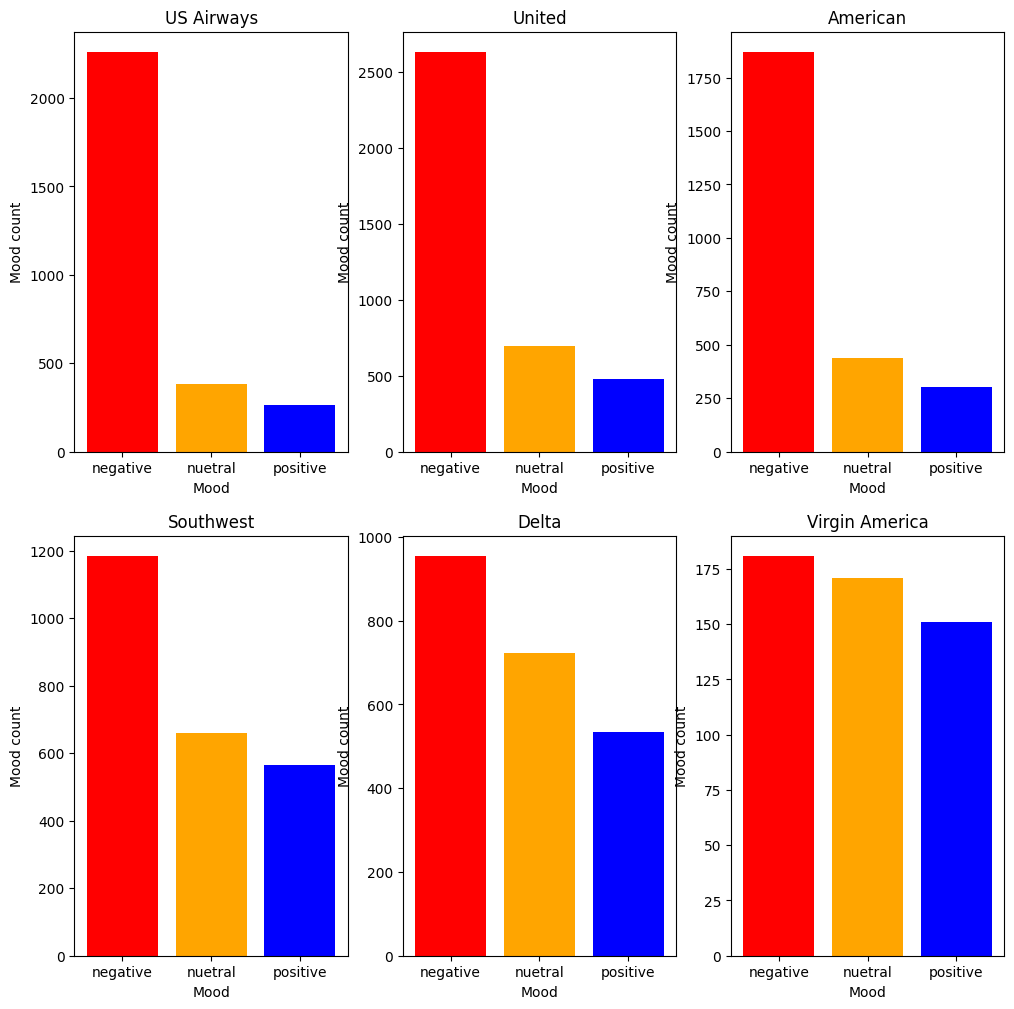

In [24]:
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))

for i in airlines:
    indices=airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df["airline"]==i]
    count=new_df['airline_sentiment'].value_counts()
    Index=[1,2,3]
    plt.bar(Index,count,color=['red','orange','blue'])
    plt.xticks(Index,['negative','nuetral','positive'])
    plt.ylabel("Mood count")
    plt.xlabel("Mood")
    plt.title(i)

WordCloud


In [26]:
from wordcloud import WordCloud,STOPWORDS

WordCloud for Negative Tweets

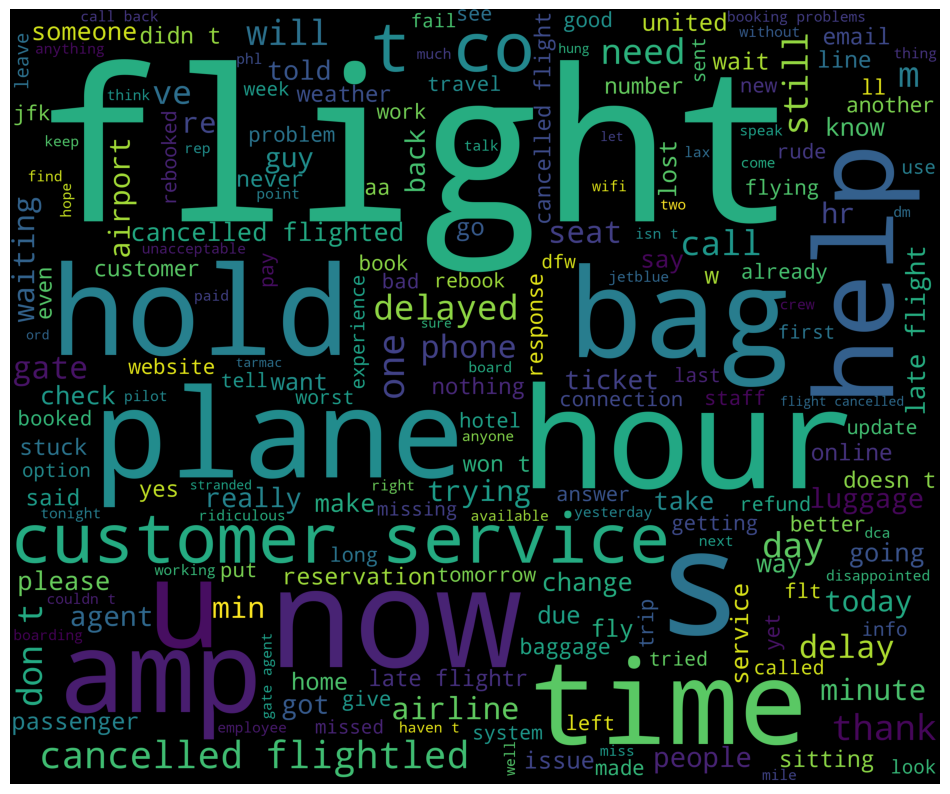

In [27]:
new_df = df[df["airline_sentiment"] == "negative"]
words = " ".join(" ".join(l) for l in new_df["text"])
cleaned_word = " ".join([word for word in words.split()
if "http" not in word and not word.startswith("@")
and word != "RT"])

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color="black",
    width=3000,
    height=2500
).generate(cleaned_word)

plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

WordCloud for Positive Tweets

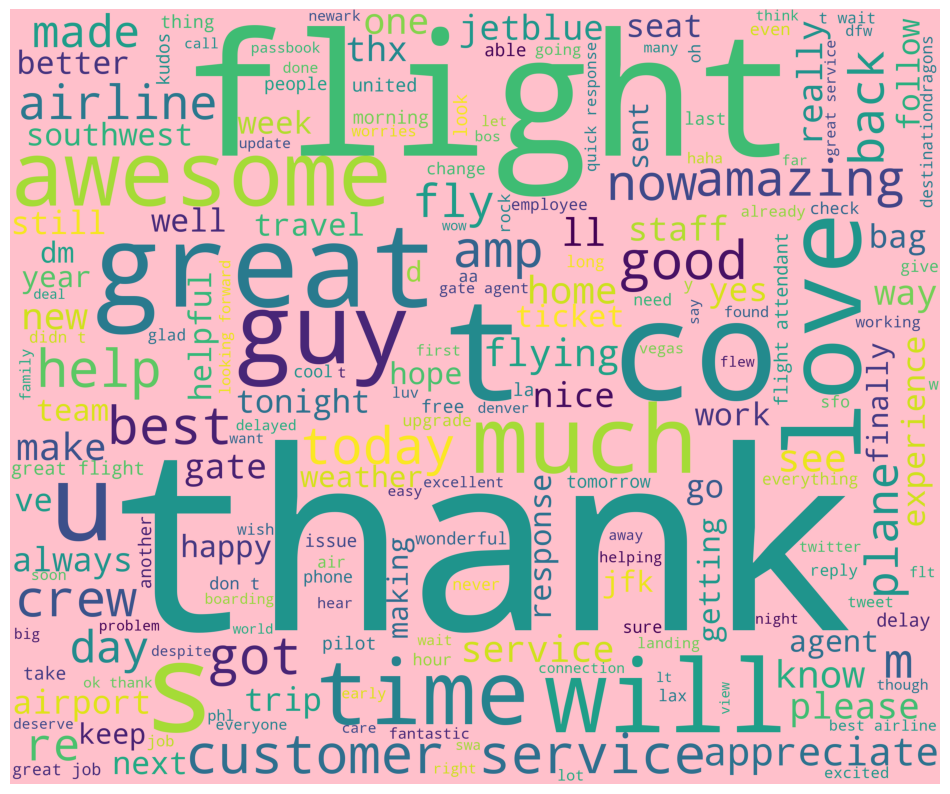

In [28]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(' '.join(m) for m in new_df["text"])
cleaned_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='pink',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

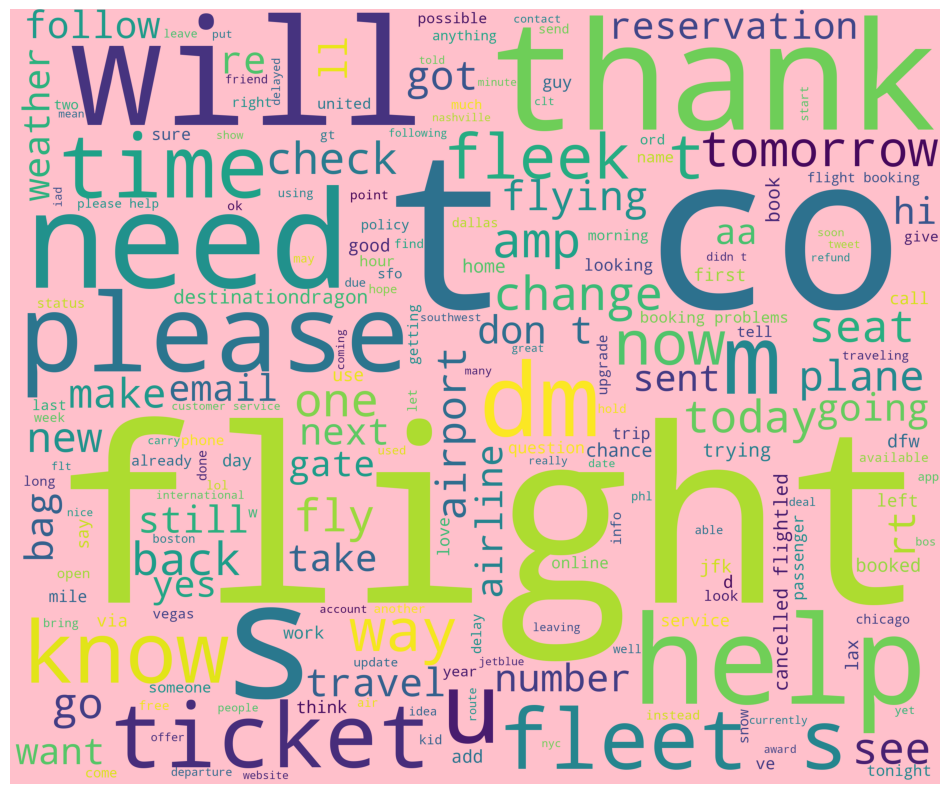

In [29]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(' '.join(m) for m in new_df["text"])
cleaned_words = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='pink',
                      width=3000,
                      height=2500
                     ).generate(cleaned_words)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Text Preprocessing and Cleaning


In [30]:
# Convert Sentiments to 0, 1, 2
def convert_Sentiment(sentiment):
    if sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0
    

In [31]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [33]:
import string
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

KeyError: 'negativereason'